In [76]:
'''
This script is an introduction to pandas
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
### 1D data stuctures --> Series
s= pd.Series([-1,3,5, np.nan, 6, 8])
print (s)
print (s[0] )

0   -1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
-1.0


In [78]:
### 2D data structures --> DataFrame (table)
dates= pd.date_range('20150101', periods=6)
table= pd.DataFrame(np.random.randn(6, 4), index=dates, columns= list('ABCD'))
print (table)

                   A         B         C         D
2015-01-01  0.884874  1.354465 -0.699776 -2.468694
2015-01-02 -0.235675 -0.636350  1.056678  1.915944
2015-01-03 -0.382759  1.131528  0.018575  1.230917
2015-01-04 -1.765993  1.369653  1.180740  1.418274
2015-01-05 -1.339582 -0.721082  0.696463 -1.510532
2015-01-06  0.162006  0.757330 -1.634959 -1.245741


In [79]:
### Table with dictionary
months= ('jan', 'feb', 'mar', 'apr')
table1= pd.DataFrame({'A': [1,2,3,4],
                      'B': pd.Timestamp('19840825'),
                      'C': np.arange(4),
                      'D': pd.Categorical(['test', 'train', 'food', 'naa'])
                      }, index= months)
print (table1)

     A          B  C      D
jan  1 1984-08-25  0   test
feb  2 1984-08-25  1  train
mar  3 1984-08-25  2   food
apr  4 1984-08-25  3    naa


In [80]:
### Exploring one table
print (table.head(3))

                   A         B         C         D
2015-01-01  0.884874  1.354465 -0.699776 -2.468694
2015-01-02 -0.235675 -0.636350  1.056678  1.915944
2015-01-03 -0.382759  1.131528  0.018575  1.230917


In [81]:
print (table1.tail(1))

     A          B  C    D
apr  4 1984-08-25  3  naa


In [82]:
### statistics for the table
print (table1.describe())

              A         C
count  4.000000  4.000000
mean   2.500000  1.500000
std    1.290994  1.290994
min    1.000000  0.000000
25%    1.750000  0.750000
50%    2.500000  1.500000
75%    3.250000  2.250000
max    4.000000  3.000000


In [83]:
print (table1['A']+ table1['C'])  # sum elements columns

jan    1
feb    3
mar    5
apr    7
dtype: int64


In [84]:
print ( sum(table1['A']) )  # sum the elements of the columns

10


In [85]:
table1.sort_index(axis=0)  ##sort by rows axis=1 is by columns

,A,B,C,D
apr,4,1984-08-25,3,naa
feb,2,1984-08-25,1,train
jan,1,1984-08-25,0,test
mar,3,1984-08-25,2,food


In [86]:
table1.loc[months[0]]  ## show first row same as: table1.iloc[0]

A                      1
B    1984-08-25 00:00:00
C                      0
D                   test
Name: jan, dtype: object

In [87]:
### Slicing rows can be done in the same way as in python
table[0:2]

,A,B,C,D
2015-01-01,0.884874,1.354465,-0.699776,-2.468694
2015-01-02,-0.235675,-0.636350,1.056678,1.915944


In [88]:
table.loc[:, ['A', 'C']]  ## slicing columns

,A,C
2015-01-01,0.884874,-0.699776
2015-01-02,-0.235675,1.056678
2015-01-03,-0.382759,0.018575
2015-01-04,-1.765993,1.180740
2015-01-05,-1.339582,0.696463
2015-01-06,0.162006,-1.634959


In [89]:
table1.loc[months[0], 'A'] ## getting one value in the table

1

In [90]:
#iloc is the same as loc but uses the indices ONLY
# it's better since the slicing method of Python works here THE SAME
table1.iloc[0,0]

1

In [91]:
table1.iloc[1:2,:]  #proof with table1.iloc[:,1:2]

,A,B,C,D
feb,2,1984-08-25,1,train


In [92]:
## creating subsets of tables
table[table<0] ## places where conditions are not satisfied= NaN

,A,B,C,D
2015-01-01,NaN,NaN,-0.699776,-2.468694
2015-01-02,-0.235675,-0.636350,NaN,NaN
2015-01-03,-0.382759,NaN,NaN,NaN
2015-01-04,-1.765993,NaN,NaN,NaN
2015-01-05,-1.339582,-0.721082,NaN,-1.510532
2015-01-06,NaN,NaN,-1.634959,-1.245741


In [93]:
table.iloc[0,1] +table.iloc[0,2]

0.65468909609929982

In [94]:
## We can create a copy of table with a new column
table_copy= table.copy()
table_copy['E']= np.arange(6)  # creates a new column
# creates a new row. Here doesn't work because table has index in rows
table_copy.append([1,-3, 0, 8, 5], ignore_index=True)
table_copy


,A,B,C,D,E
2015-01-01,0.884874,1.354465,-0.699776,-2.468694,0
2015-01-02,-0.235675,-0.636350,1.056678,1.915944,1
2015-01-03,-0.382759,1.131528,0.018575,1.230917,2
2015-01-04,-1.765993,1.369653,1.180740,1.418274,3
2015-01-05,-1.339582,-0.721082,0.696463,-1.510532,4
2015-01-06,0.162006,0.757330,-1.634959,-1.245741,5


In [95]:
table_copy.loc[:,'D']=np.array([0]*len(table_copy))
table_copy

,A,B,C,D,E
2015-01-01,0.884874,1.354465,-0.699776,0,0
2015-01-02,-0.235675,-0.636350,1.056678,0,1
2015-01-03,-0.382759,1.131528,0.018575,0,2
2015-01-04,-1.765993,1.369653,1.180740,0,3
2015-01-05,-1.339582,-0.721082,0.696463,0,4
2015-01-06,0.162006,0.757330,-1.634959,0,5


In [96]:
### THE FOLLOWING FUNCTIONS ARE VERY IMPORTANT
### TO CLEANING DATA!!!!!!!!
### Note: missing data represented by np.NaN
table_new= table.reindex(index=dates[0:3], columns=list(table.iloc[:,0:3]))
table_new.iloc[0,1],table_new.iloc[2,2]= np.nan, np.nan
table_new

,A,B,C
2015-01-01,0.884874,NaN,-0.699776
2015-01-02,-0.235675,-0.636350,1.056678
2015-01-03,-0.382759,1.131528,NaN


In [97]:
### Drops rows with missing data
table_new.dropna(how='any')

,A,B,C
2015-01-02,-0.235675,-0.63635,1.056678


In [98]:
## fills NaN cells with a given number
table_new.fillna(value=5)

,A,B,C
2015-01-01,0.884874,5.000000,-0.699776
2015-01-02,-0.235675,-0.636350,1.056678
2015-01-03,-0.382759,1.131528,5.000000


In [99]:
### get the boolean mask of missing values=True
pd.isnull(table_new)

,A,B,C
2015-01-01,False,True,False
2015-01-02,False,False,False
2015-01-03,False,False,True


In [100]:
###Stats -> functions EXCLUDE missing values
##Note: TO SEE ALL THE FUNCTIONS THAT A TABLE CAN HAVE
##      TYPE TAB AFTER WRITING THE NAME OF THE TABLE
table_new.mean(0)  #give mean for columns, same as: table_new.apply(np.mean)

A    0.088813
B    0.247589
C    0.178451
dtype: float64

In [101]:
table_new.mean(1) # give mean for rows

2015-01-01    0.092549
2015-01-02    0.061551
2015-01-03    0.374384
Freq: D, dtype: float64

In [102]:
table.cumsum(0)  #cumulative sum over columns

,A,B,C,D
2015-01-01,0.884874,1.354465,-0.699776,-2.468694
2015-01-02,0.649198,0.718115,0.356902,-0.552750
2015-01-03,0.266439,1.849643,0.375477,0.678167
2015-01-04,-1.499554,3.219296,1.556217,2.096441
2015-01-05,-2.839136,2.498214,2.252680,0.585910
2015-01-06,-2.677129,3.255544,0.617721,-0.659831


In [103]:
table.cumsum(1)  # cumulative sun over rows

,A,B,C,D
2015-01-01,0.884874,2.239339,1.539563,-0.929132
2015-01-02,-0.235675,-0.872026,0.184652,2.100596
2015-01-03,-0.382759,0.748769,0.767344,1.998262
2015-01-04,-1.765993,-0.396340,0.784400,2.202674
2015-01-05,-1.339582,-2.060664,-1.364201,-2.874733
2015-01-06,0.162006,0.919337,-0.715623,-1.961364


In [104]:
# Note: APPLY WORKS OVER THE COLUMNS NOT ROWS
# Useful to make frec tables
table_new.apply(np.cumsum) #same as table_new.cumsum(0) 

,A,B,C
2015-01-01,0.884874,NaN,-0.699776
2015-01-02,0.649198,-0.636350,0.356902
2015-01-03,0.266439,0.495178,NaN


In [105]:
#### other functions:
# 1. groupby -> groups elements of the same category and 
#               apply a function to them


In [106]:
# 2. reshaping to create more columns in a table
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
ta= pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
ta

A         B
first second                    
bar   one     1.220957 -1.344211
      two    -0.133674 -2.639497
baz   one    -0.995238  0.921580
      two    -0.804131 -0.634950
foo   one    -1.368591 -0.544889
      two     0.871960 -0.634775
qux   one    -1.309562 -1.746543
      two    -1.140748 -2.187524

In [107]:
# 3. Dynamic tables
# 4. Time series -> with pandas.Series()


In [108]:
# 5. Histograming
s = pd.Series(np.random.randint(0, 7, size=10))
s
s.value_counts()

4    4
3    2
0    2
6    1
5    1
dtype: int64

In [109]:
# 6. Categorical variables
tab= pd.DataFrame({"id":[1,2,3,4,5,6],
                   "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
tab['grade']= tab['raw_grade'].astype('category') #convert to categorical
tab['grade'].cat.categories=['good', 'bad', 'terrible']
tab

,id,raw_grade,grade
0,1,a,good
1,2,b,bad
2,3,b,bad
3,4,a,good
4,5,a,good
5,6,e,terrible


In [110]:
# some analysis:
tab.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,good
3,4,a,good
4,5,a,good
1,2,b,bad
2,3,b,bad
5,6,e,terrible


In [111]:
tab.groupby('grade').size()

grade
good        3
bad         2
terrible    1
dtype: int64

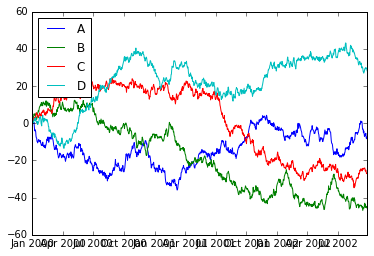

In [122]:
##### PLOTTING
tab1= pd.DataFrame(np.random.randn(1000, 4), 
                   index= pd.date_range('1/1/2000',periods= 1000),
                   columns= ['A', 'B', 'C', 'D'])
tab1= tab1.cumsum()
fig= plt.figure()
ax= fig.add_subplot(111)
ax.plot(tab1)
ax.legend(loc='best', labels= tab1.columns)

In [124]:
#### IMPORTANT FOR DATA SCIENCE. 
### HOW TO WRITE/READ DATA
# 1. CSV 
tab1.to_csv('some_table.csv')  #write
pd.read_csv('some_table.csv')  #read

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.541653,0.107970,-0.042571,0.247559
1,2000-01-02,2.107777,1.279179,0.968685,1.059633
2,2000-01-03,2.062046,1.569130,0.012360,0.941324
3,2000-01-04,0.774444,3.115814,1.245638,0.236742
4,2000-01-05,-0.103111,3.770170,2.317175,0.217313
5,2000-01-06,0.388103,4.980638,2.814941,1.697647
6,2000-01-07,-1.745114,4.717890,2.320397,2.644103
7,2000-01-08,-4.041667,4.271817,3.012585,1.723887
8,2000-01-09,-3.466292,5.136361,3.318554,1.594780
9,2000-01-10,-4.254682,4.914098,3.337083,1.274227


In [126]:
#2. HDF5
tab1.to_hdf('some_table.h5', 'tab1')  #write
pd.read_hdf('some_table.h5', 'tab1')  # read

,A,B,C,D
2000-01-01,1.541653,0.107970,-0.042571,0.247559
2000-01-02,2.107777,1.279179,0.968685,1.059633
2000-01-03,2.062046,1.569130,0.012360,0.941324
2000-01-04,0.774444,3.115814,1.245638,0.236742
2000-01-05,-0.103111,3.770170,2.317175,0.217313
2000-01-06,0.388103,4.980638,2.814941,1.697647
2000-01-07,-1.745114,4.717890,2.320397,2.644103
2000-01-08,-4.041667,4.271817,3.012585,1.723887
2000-01-09,-3.466292,5.136361,3.318554,1.594780
2000-01-10,-4.254682,4.914098,3.337083,1.274227


In [128]:
# 3. Excel files
tab1.to_excel('some_table.xlsx', sheet_name='Sheet1') # write
pd.read_excel('some_table.xlsx', 'Sheet1', index_col=None,na_values=['NA'] )

,A,B,C,D
2000-01-01,1.541653,0.107970,-0.042571,0.247559
2000-01-02,2.107777,1.279179,0.968685,1.059633
2000-01-03,2.062046,1.569130,0.012360,0.941324
2000-01-04,0.774444,3.115814,1.245638,0.236742
2000-01-05,-0.103111,3.770170,2.317175,0.217313
2000-01-06,0.388103,4.980638,2.814941,1.697647
2000-01-07,-1.745114,4.717890,2.320397,2.644103
2000-01-08,-4.041667,4.271817,3.012585,1.723887
2000-01-09,-3.466292,5.136361,3.318554,1.594780
2000-01-10,-4.254682,4.914098,3.337083,1.274227
